## Diabetes en una poblacion en india

*Predecir si una integrante de una muestra que representa a una población, en este caso de Indias Pima, tiene diabetes.*

*Queremos hacer esto a partir de múltiples variables que tenemos de cada uno de los pacientes:*

- Pregnancies: Número de embarazos que ha tenido en su vida
- Glucose: Nivel de concentración de glucosa en sangre
- BloodPressure: Presión arterial
- SkinThikness: Espesor de piel a la altura del triceps
- Insulin: Respuesta a dosis de insulina en 2 horas
- BMI: Índice de masa corporal
- DiabetesPedigreeFunction: Presencia de diabetes en ascendencia directa
- Age: Edad del paciente
- Outcome: Variable que queremos predecir --> 1 = Tiene diabetes, 0 = no tiene diabetes

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
URL:str =r"https://docs.google.com/spreadsheets/d/e/2PACX-1vTVjHDHSf0d-qpQZrqCIlynVf0KkqZ8MEloq1OF0SOsAXquEBfGXAfKFWv1917fwAbjcxZn4wv8XX7K/pub?gid=333071130&single=true&output=csv"

In [16]:
poblacion_india_df = pd.read_csv(URL, encoding="utf8",sep=",")
poblacion_india_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
poblacion_india_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
poblacion_india_df.columns=poblacion_india_df.columns.str.lower()

In [19]:
poblacion_india_df.describe().T

,count,mean,std,min,25%,50%,75%,max
pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
bloodpressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skinthickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
diabetespedigreefunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Pequeño analisis para saber ver como esta correlacionada

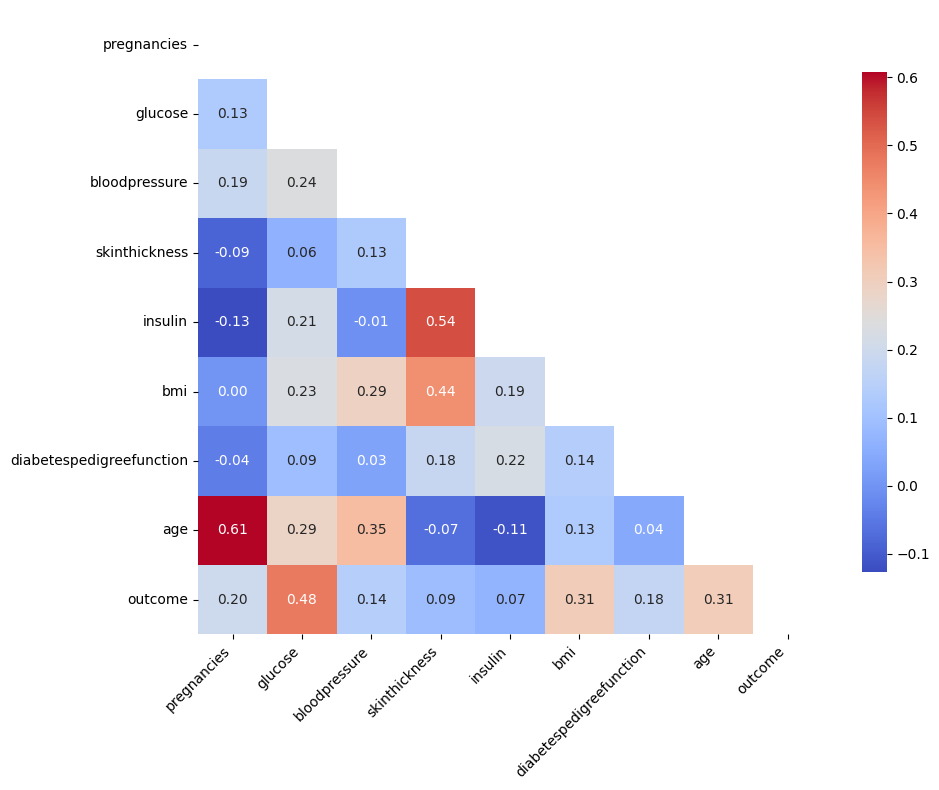

In [20]:
# analisis de correlacion
corr = poblacion_india_df.corr(numeric_only=True,method='spearman')

# nos permite hacer una mascara para que solo se vea un lado del triangulo de correlacion
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(corr, 
            mask=mask,  # Aplicar la máscara
            annot=True, 
            cmap='coolwarm',
            square=True,  # Hacer las celdas cuadradas
            fmt='.2f',    # Formato de 2 decimales para las anotaciones
            cbar_kws={'shrink': 0.8})

# etiquetas a 45 grados
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# ajuste de chart
plt.tight_layout()
plt.show()

Correlaciones fuertes entre features:
- age ↔ pregnancies (0.61): Alta correlación
- skinthickness ↔ insulin (0.54):  Alta correlación
- skinthickness ↔ bmi (0.44): Moderada-alta

Eleccion de variable target = 'outcome'

In [21]:
def categorizar_correlacion(valor):
    valor_abs = abs(valor)
    
    categorias = [
        (0.5, float('inf'), 'Muy Fuerte'),
        (0.3, 0.5, 'Fuerte'),
        (0.2, 0.3, 'Moderada'), 
        (0.1, 0.2, 'Débil'),
        (0.0, 0.1, 'Muy Débil')
    ]
    
    for min_val, max_val, categoria in categorias:
        if min_val <= valor_abs < max_val:
            return categoria
    
    return 'Muy Débil'


def analizar_correlaciones_completo(df, variable_objetivo, metodo='spearman'):

    corr_matrix = df.corr(numeric_only=True, method=metodo)
    correlaciones = corr_matrix[variable_objetivo].drop(variable_objetivo)
    
    analisis = pd.DataFrame({
        'variable': correlaciones.index,
        'correlacion': correlaciones.values,
        'correlacion_abs': abs(correlaciones.values)
    })
    
    
    analisis['categoria'] = analisis['correlacion'].apply(categorizar_correlacion)
    analisis['ranking'] = analisis['correlacion_abs'].rank(ascending=False)
    
    # Ordenar por importancia
    analisis = analisis.sort_values('correlacion_abs', ascending=False)
    
    return analisis


def recomendar_variables_modelos(df, variable_objetivo, metodo='spearman'):

    # Obtener análisis de correlaciones
    analisis = analizar_correlaciones_completo(df, variable_objetivo, metodo)
    
    # Filtrar variables por importancia
    muy_fuertes = analisis[analisis['categoria'].isin(['Muy Fuerte', 'Fuerte'])]
    moderadas = analisis[analisis['categoria'] == 'Moderada']
    
    # CORRECCIÓN: Usar .iloc para seleccionar las primeras filas y luego la columna 'variable'
    variables_minimas_list = muy_fuertes.head(2)['variable'].tolist()
    
    # Recomendaciones
    recomendaciones = {
        'variables_optimas': muy_fuertes['variable'].tolist(),
        'variables_completas': muy_fuertes['variable'].tolist() + moderadas['variable'].tolist(),
        'variables_minimas': variables_minimas_list,
        'analisis_detallado': analisis
    }
    
    return recomendaciones

In [22]:
recomendaciones = recomendar_variables_modelos(df=poblacion_india_df, variable_objetivo= 'outcome')

In [23]:
recomendaciones.get("analisis_detallado")

,variable,correlacion,correlacion_abs,categoria,ranking
1,glucose,0.475776,0.475776,Fuerte,1.0
5,bmi,0.309707,0.309707,Fuerte,2.0
7,age,0.309040,0.309040,Fuerte,3.0
0,pregnancies,0.198689,0.198689,Débil,4.0
6,diabetespedigreefunction,0.175353,0.175353,Débil,5.0
2,bloodpressure,0.142921,0.142921,Débil,6.0
3,skinthickness,0.089728,0.089728,Muy Débil,7.0
4,insulin,0.066472,0.066472,Muy Débil,8.0


*Objetivo finalizado para obtencion de variables que nos den la relacion suficiente*

*Analisis de variables para una regresion lineal*

In [24]:
linear_recomendaciones = recomendar_variables_modelos(df=poblacion_india_df, variable_objetivo= 'diabetespedigreefunction')

In [25]:
linear_recomendaciones.get("analisis_detallado")

,variable,correlacion,correlacion_abs,categoria,ranking
4,insulin,0.221150,0.221150,Moderada,1.0
3,skinthickness,0.180390,0.180390,Débil,2.0
7,outcome,0.175353,0.175353,Débil,3.0
5,bmi,0.141192,0.141192,Débil,4.0
1,glucose,0.091293,0.091293,Muy Débil,5.0
0,pregnancies,-0.043242,0.043242,Muy Débil,6.0
6,age,0.042909,0.042909,Muy Débil,7.0
2,bloodpressure,0.030046,0.030046,Muy Débil,8.0
